---
- 데이터 불러오기

In [1178]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [1179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### Title Mapping, Feature
- Master ==> 0
- Miss : Mlle, Ms, Countess ==> 1      
- Mrs : 'Lady','Dona' ==> 2
- Mr : 'Mme', 'Dr', 'Sir','Capt','Rev','Major','Col','Jonkheer','Don'  ==> 3 

In [1180]:
train['Title'] = train['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)
test['Title'] = test['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)

In [1181]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1182]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [1183]:
# Title other 처리 
train['Title'] = train['Title'].replace(['Mlle', 'Ms', 'Countess'],'Miss')
train['Title'] = train['Title'].replace(['Mme', 'Dr', 'Sir','Capt','Rev','Major','Col','Jonkheer','Don'],'Mr')
train['Title'] = train['Title'].replace(['Lady','Dona'],'Mrs')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [1184]:
# test other 처리 
test['Title'] = test['Title'].replace(['Mlle', 'Ms', 'Countress'],'Miss')
test['Title'] = test['Title'].replace(['Mme', 'Dr', 'Sir','Capt','Rev','Major','Col','Jonkheer'],'Mr')
test['Title'] = test['Title'].replace(['Lady','Dona'],'Mrs')

test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [1185]:
# title feature
title_mapping = {'Master':0, 'Miss':1,'Mrs':2,'Mr':3}

train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [1186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [1187]:
train[(train['Title']==2)&(train['SibSp']==1)&(train['Cabin'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,2
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,2
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,2
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,2
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,2
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,2
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,2
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,2
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,2


In [1188]:
# 정규표현식 써서 Mrs과 Mr 부부 찾기
# Cabin 채울 수 있을지 ? 

---
### Sex Feature
- male : 0
- female : 1

In [1189]:
sex_mapping = {'male':0,'female':1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] =  test['Sex'].map(sex_mapping)

---
### Embarked Feature
- NaN => S로 채우기 
- S : 0
- C : 1
- Q : 2

In [1190]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

In [1191]:
embarked_mapping = {'S':0,'C':1,'Q':2}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [1192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [1193]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,3


---
### Fare 구분, Feature 
- Fare 0~30  =>  0
- Fare 31~250  => 1
- Fare 251~  => 2

In [1194]:
import seaborn as sns

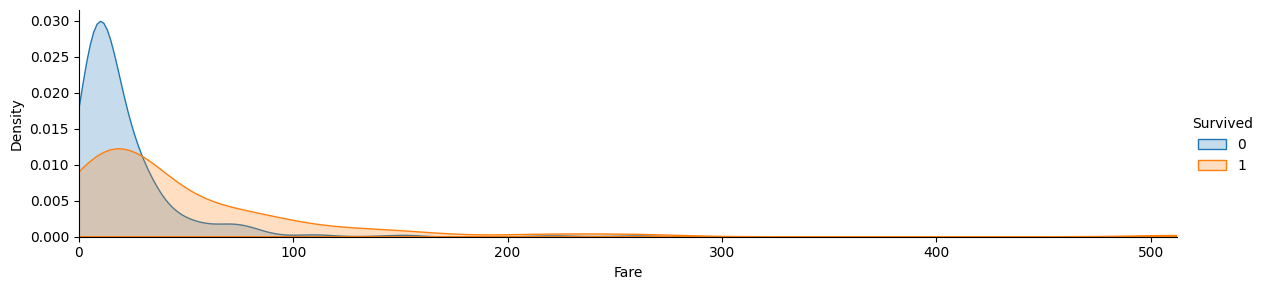

In [1195]:
# Fare별 Survived 시각화 
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

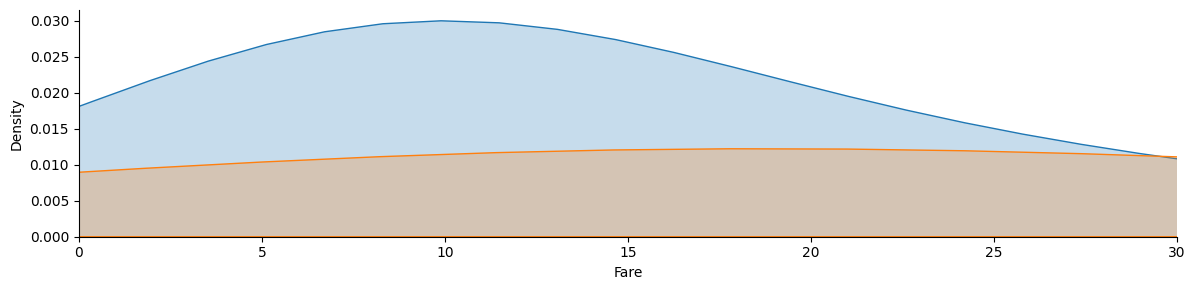

In [1196]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,30))

In [1197]:
def bar_chart(feature) : 

    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True)

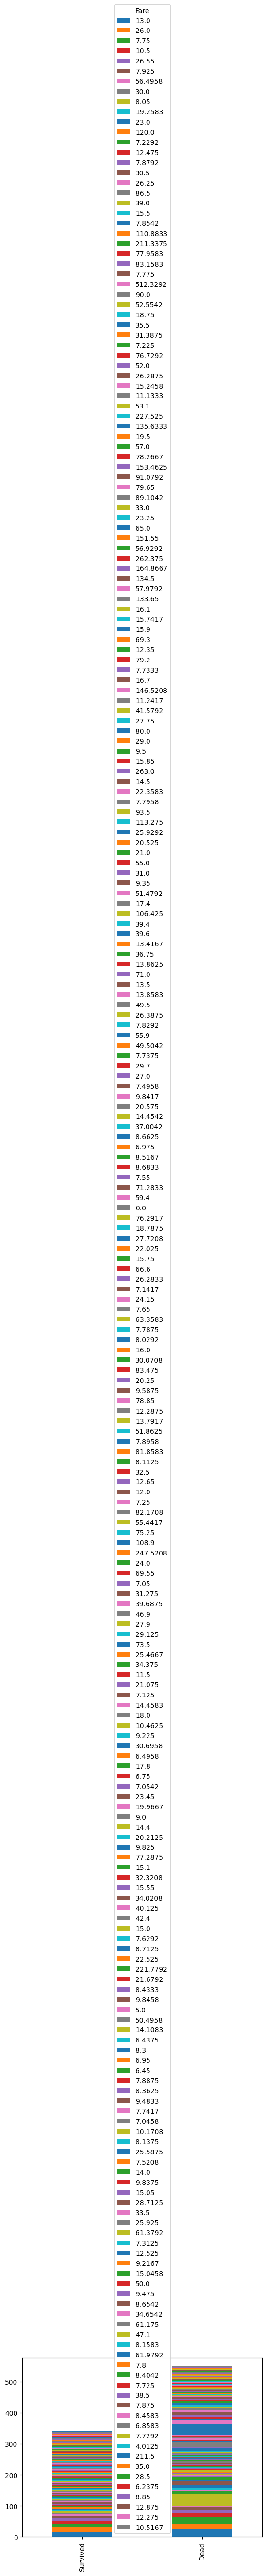

In [1198]:
bar_chart('Fare')

In [1199]:
# for문으로 train, test Fare Feature 

train_test_data = [ train, test]

for train_cp in train_test_data : 
    train_cp.loc[(train_cp['Fare'] <= 30),'Fare'] = 0
    train_cp.loc[(train_cp['Fare'] >30)&(train_cp['Fare']<=250),'Fare'] = 1
    train_cp.loc[train_cp['Fare']>250,'Fare'] = 2

train.head()
# cut() ===> 균일하게 자르는 코드 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.0,NaN,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1.0,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,1.0,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.0,NaN,0,3


In [1200]:
# Test Data Fare NaN = 1 처리 
test.loc[test['Fare'].isnull(),'Fare'] = 1

In [1201]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 39.3+ KB


In [1202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [1203]:
test[test['PassengerId']==1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


---
### Cabin Nan처리, Feature
- NaN 값처리  ==>  Pclass별 많은 방으로 채우기 
- Mapping  ==>  'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8

In [1204]:
# Cabin 알파벳만 
train_test_data = [train, test]

for train_cabin in train_test_data :
    train_cabin['Cabin'] = train_cabin['Cabin'].str[:1]

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.0,NaN,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1.0,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,1.0,C,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.0,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,0.0,B,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,0.0,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,0.0,C,1,3


In [1205]:
# Cabin NaN 처리 
train_test_data = [train, test]

for train_cabin_nan in train_test_data : 
    train_cabin_nan.loc[(train_cabin_nan['Pclass'] ==1 ) & (train_cabin_nan['Cabin']).isnull(), 'Cabin'] = 'D'
    train_cabin_nan.loc[(train_cabin_nan['Pclass'] ==2 ) & (train_cabin_nan['Cabin']).isnull(), 'Cabin'] = 'F'
    train_cabin_nan.loc[(train_cabin_nan['Pclass'] ==3 ) & (train_cabin_nan['Cabin']).isnull(), 'Cabin'] = 'G'

In [1206]:
# Cabin Mapping
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8}

train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.0,2.4,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1.0,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.0,2.4,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,1.0,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.0,2.4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,0.0,2.0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,0.0,0.4,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,0.0,2.4,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,0.0,0.8,1,3


In [1207]:
train['Cabin'].unique(), test['Cabin'].unique()

(array([2.4, 0.8, 1.6, 2. , 1.2, 0. , 0.4, 2.8]),
 array([2.4, 2. , 1.2, 0.4, 1.6, 0. , 0.8]))

In [1208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 90.6+ KB


In [1209]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    float64
 10  Embarked     418 non-null    int64  
 11  Title        418 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 39.3+ KB


---
### Age NaN
- NAN 처리
- Age Feature

In [1210]:
# Age Feature 

trian_test_data = [train, test]

for train_cp in trian_test_data : 
    train_cp.loc[train_cp['Age']<=14,'Age'] = 0
    train_cp.loc[(train_cp['Age'] > 14) & (train_cp['Age'] <= 30),'Age'] = 1
    train_cp.loc[(train_cp['Age'] > 30) & (train_cp['Age'] <= 40),'Age'] = 2
    train_cp.loc[(train_cp['Age'] > 40) & (train_cp['Age'] <= 58),'Age'] = 3
    train_cp.loc[(train_cp['Age'] > 58),'Age'] = 4 

In [1211]:
train['Age'].value_counts(), test['Age'].value_counts()

(Age
 1.0    332
 2.0    155
 3.0    122
 0.0     77
 4.0     28
 Name: count, dtype: int64,
 Age
 1.0    170
 3.0     62
 2.0     55
 0.0     30
 4.0     15
 Name: count, dtype: int64)

In [1212]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,0.0,2.4,2,3
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,0.0,2.0,0,3
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,0.0,2.4,1,2
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,0.0,2.4,1,3
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,0.0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,0.0,2.4,1,3
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,1.0,2.4,0,1
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,0.0,2.4,0,3
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,0.0,2.4,0,3


In [1213]:
# train_cp['Title']별 age nan 평균값으로 처리
for train_title in trian_test_data:
    train_title.loc[(train_title['Title']==0)&(train_title['Age']).isnull(), 'Age'] = 0
    train_title.loc[(train_title['Title']==1)&(train_title['Age']).isnull(), 'Age'] = 1
    train_title.loc[(train_title['Title']==2)&(train_title['Age']).isnull(), 'Age'] = 2
    train_title.loc[(train_title['Title']==3)&(train_title['Age']).isnull(), 'Age'] = 3

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.4,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,1.0,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.4,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,1.0,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1.0,0,0,211536,0.0,2.0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,0.0,0.4,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,0.0,2.4,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,0.0,0.8,1,3


---
### Ticket, Name, SibSp, Parch, Fare 삭제 

In [1214]:
drop_feature=['Ticket','Name','SibSp','Parch','Fare','Cabin']

train = train.drop(drop_feature, axis=1)
test = test.drop(drop_feature, axis=1)

In [1215]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 6), (891,))

In [1216]:
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title
0,1,0,3,0,1.0,0,3
1,2,1,1,1,2.0,1,2
2,3,1,3,1,1.0,0,1
3,4,1,1,1,2.0,0,2
4,5,0,3,0,2.0,0,3
...,...,...,...,...,...,...,...
886,887,0,2,0,1.0,0,3
887,888,1,1,1,1.0,0,1
888,889,0,3,1,1.0,0,1
889,890,1,1,0,1.0,1,3


In [1217]:
test

,PassengerId,Pclass,Sex,Age,Embarked,Title
0,892,3,0,2.0,2,3
1,893,3,1,3.0,0,2
2,894,2,0,4.0,2,3
3,895,3,0,1.0,0,3
4,896,3,1,1.0,0,2
...,...,...,...,...,...,...
413,1305,3,0,3.0,0,3
414,1306,1,1,2.0,1,2
415,1307,3,0,2.0,0,3
416,1308,3,0,3.0,0,3


---
### Modeling

In [1218]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [1219]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### ★ 최적의 파라미터 구하기 

In [1220]:
y_titanic_df = target
X_titanic_df = train_data
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape) 

In [1225]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = RandomForestClassifier() # Model object
scoring = 'accuracy' # 평가지표 : 정확도
parameters = {'max_depth':[4,5,6],'n_estimators':[250,300,350],'max_features':[2,3,4]}
grid_dclf = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)
print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

{'max_depth': 5, 'max_features': 3, 'n_estimators': 300}
0.8187924751305033


In [ ]:
<cv=5>
550, 5, 3
300, 5, 3 => 82.0

In [1224]:
# # 점수 확인
k_fold = KFold(n_splits=10, shuffle=True, random_state= 156)
clf = RandomForestClassifier(n_estimators=300, max_depth=5, max_features=3)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs=-1, scoring=scoring)

print(score.mean())

0.8204244694132334


In [1226]:
clf = RandomForestClassifier(n_estimators=300, max_depth=5, max_features=3)
clf.fit(train_data, target)

prediction = clf.predict(test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1227]:
# X_feature = prediction
# y_label = prediction

# X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.2, random_state=156)

# X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# print(X_train.shape, X_test.shape)
# print(X_tr.shape, X_val.shape) 

(712, 6) (179, 6)
(640, 6) (72, 6)


In [1228]:
# DataFrame => ndarray => DMatrix 변환
dtr = xgb.DMatrix(data=X_tr, label=y_tr)        # X_tr, y_tr : 학습에 사용할 데이터 변환
dval = xgb.DMatrix(data=X_val, label=y_val)     # X_val, y_val : 검증에 사용할 데이터 변환
dtest = xgb.DMatrix(data=X_test , label=y_test) # X_test, y_test : 테스트에 사용할 데이터 변환

In [1229]:
# 파라미터 생성 
params = { 
    'max_depth':3,                      # 트리 깊이 지정 
    'eta': 0.05,                        # 학습률
    'objective':'binary:logistic',      # logistic : 이진분류 (답이 2개뿐)
    'eval_metric':'logloss'             # 검증할 함수 지정 
} 

num_rounds = 400                        # 트리 개수 

In [1230]:
# 학습데이터 셋은 'train' 또는 평가 데이터 셋을 'eval'로 명기합니다. 
eval_list = [(dtr,'prediction'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(
        params = params
      , dtrain = dtr  
      , num_boost_round = num_rounds 
      , early_stopping_rounds = 50      # 50개를 돌려서 오차의 최소를 구하면 조기중단
      , evals = eval_list 
    )  

# 학습이 종료되었다는 것은?
# 오차가 최소가 되는 W를 구했다를 의미한다. ( 오차=0를 찾는 것이 아니다 )

[0]	prediction-logloss:0.66963	eval-logloss:0.66875
[1]	prediction-logloss:0.64831	eval-logloss:0.64668
[2]	prediction-logloss:0.62893	eval-logloss:0.62666
[3]	prediction-logloss:0.61127	eval-logloss:0.60845
[4]	prediction-logloss:0.59514	eval-logloss:0.59203
[5]	prediction-logloss:0.58038	eval-logloss:0.57649
[6]	prediction-logloss:0.56683	eval-logloss:0.56277
[7]	prediction-logloss:0.55439	eval-logloss:0.55009
[8]	prediction-logloss:0.54294	eval-logloss:0.53844
[9]	prediction-logloss:0.53239	eval-logloss:0.52749
[10]	prediction-logloss:0.52266	eval-logloss:0.51763
[11]	prediction-logloss:0.51367	eval-logloss:0.50889
[12]	prediction-logloss:0.50536	eval-logloss:0.50086
[13]	prediction-logloss:0.49767	eval-logloss:0.49350
[14]	prediction-logloss:0.49054	eval-logloss:0.48681
[15]	prediction-logloss:0.48377	eval-logloss:0.48021
[16]	prediction-logloss:0.47772	eval-logloss:0.47448
[17]	prediction-logloss:0.47190	eval-logloss:0.46880
[18]	prediction-logloss:0.46670	eval-logloss:0.46418
[19

In [1232]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"], 
        "Survived":prediction
    }
)
submission.to_csv('0529test1.csv', index=False)

In [1231]:
submission1 = pd.read_csv('./submission (1).csv')
del submission1['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction,submission1)
accuracy

0.7918660287081339